# UoG-DA_Group28 Jupyter Notebook

## <u> Data Pre-Processing </u>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from UWB_LOS_NLOS_Data_Set.code.uwb_dataset import *

# Method to extract data from all 7 files to a Pandas DataFrame
def import_from_files_single_dataframe(rootdir):
    file_list =[]
    for dirpath, dirnames, filenames in os.walk(rootdir):
        for file in filenames:
            filename = os.path.join(dirpath, file)
            print(filename)
            file_list.append(filename) 
            # read data from file

    df = pd.concat((pd.read_csv(f) for f in file_list), ignore_index=True)
    
    return df

In [5]:
# Import raw data from folder with dataset
print("Importing dataset to Pandas dataframe")
print("-------------------------------")
data = import_from_files_single_dataframe("./UWB_LOS_NLOS_Data_Set/dataset/")

print("\nDataset:")
print("-------------------------------")
print(data)

Importing dataset to Pandas dataframe
-------------------------------
./UWB_LOS_NLOS_Data_Set/dataset/uwb_dataset_part1.csv
./UWB_LOS_NLOS_Data_Set/dataset/uwb_dataset_part2.csv
./UWB_LOS_NLOS_Data_Set/dataset/uwb_dataset_part3.csv
./UWB_LOS_NLOS_Data_Set/dataset/uwb_dataset_part4.csv
./UWB_LOS_NLOS_Data_Set/dataset/uwb_dataset_part5.csv
./UWB_LOS_NLOS_Data_Set/dataset/uwb_dataset_part6.csv
./UWB_LOS_NLOS_Data_Set/dataset/uwb_dataset_part7.csv

Dataset:
-------------------------------
       NLOS  RANGE  FP_IDX  FP_AMP1  FP_AMP2  FP_AMP3  STDEV_NOISE  CIR_PWR  \
0       0.0   3.90   745.0  18712.0  10250.0  11576.0         64.0  11855.0   
1       0.0   0.66   749.0  11239.0   6313.0   4712.0         64.0  18968.0   
2       1.0   7.86   746.0   4355.0   5240.0   3478.0         60.0  14699.0   
3       1.0   3.48   750.0   8502.0   8416.0   5890.0         76.0   8748.0   
4       0.0   1.19   746.0  17845.0  18095.0  12058.0         68.0  11380.0   
...     ...    ...     ...      ... 

In [6]:
# Check if where are any nulls or missing values in dataset

print("\nAre Nulls detected in dataframe: ", data.isnull().values.any())

print("\nNumber of Nulls detected in dataframe by attribute:")
print("-------------------------------")
print(data.isnull().sum())


Are Nulls detected in dataframe:  False

Number of Nulls detected in dataframe by attribute:
-------------------------------
NLOS       0
RANGE      0
FP_IDX     0
FP_AMP1    0
FP_AMP2    0
          ..
CIR1011    0
CIR1012    0
CIR1013    0
CIR1014    0
CIR1015    0
Length: 1031, dtype: int64


In [ ]:
import sklearn
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data)
projected = pca.transform(data)
projected_1 = pd.DataFrame(projected,index=range(1,data.shape[0]+1))

projected_1

,0,1,2,3,4,5,6,7,8,9,...,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030
1,-3386.432268,14010.810445,6696.255997,2994.301662,5013.270382,-4346.186792,-1063.425598,24.123417,8588.983555,-3716.470863,...,16.499572,-85.017839,7.538887,4.096125,0.144032,1.346948,-0.308027,7.375434e-12,3.749889e-12,-8.810730e-13
2,25211.032846,-15485.323901,7584.883629,-7528.293646,9002.227168,-2270.167968,-2291.911975,148.339989,3963.637766,-8548.169521,...,-13.439108,58.402016,-5.054639,2.731250,0.588189,-1.436517,-0.309159,-8.952838e-12,-9.094947e-13,6.515677e-12
3,11518.997733,-15024.755373,12090.141478,620.407129,4393.560546,-1786.441455,1354.733395,-1358.080263,1101.967653,4335.936147,...,-29.346084,-93.285430,-6.820828,2.643203,-1.870781,2.399149,0.347489,-2.003731e-12,-5.904610e-12,1.598721e-12
4,6011.290735,-14757.546733,65.982138,-5330.611182,2077.111037,-4919.782495,-890.070749,-1982.166910,3083.771847,-2289.133716,...,98.507899,-52.229071,1.327350,-0.215180,1.480066,-0.731079,0.113612,1.250555e-12,-1.021405e-12,2.437162e-12
5,-3016.688967,19785.758466,-3611.328990,6632.572121,2564.297356,-2358.173939,-428.188749,-4589.031078,5464.550770,1328.727111,...,-39.665409,-22.227060,-8.458467,-0.852183,1.330364,0.496083,-0.025729,1.335820e-12,8.402168e-13,4.789058e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41996,-3742.655310,11138.057260,8241.038216,-4410.851002,-3198.157790,-10876.281214,7134.446967,3042.375553,2715.896248,2161.863841,...,113.602517,-16.790365,-3.955282,-5.370213,-1.343135,-0.317280,0.001874,7.034373e-12,-6.680878e-12,-3.112177e-12
41997,828.568670,10037.926877,2605.686335,5165.700095,-2367.259854,9447.433282,-4255.211302,5906.216836,-4594.740839,816.314872,...,-98.447174,-28.776260,5.533996,-2.096539,2.368247,0.113100,-0.037852,1.875833e-12,3.556266e-12,1.151079e-12
41998,-15190.757597,-8685.312788,-8116.532758,3625.699383,-1371.982750,-3003.008827,926.871809,2043.208090,3901.991212,-496.165423,...,20.275476,-68.436085,1.698664,-1.828060,1.194578,0.272168,-0.096210,-8.526513e-14,-7.105427e-14,-1.186606e-12
41999,-20250.382468,-5630.985594,-4833.941756,-4904.735745,-1541.109648,-1668.990755,883.120848,184.302757,2246.488991,0.841563,...,14.170149,-16.401356,-9.775764,0.917025,-0.016478,-1.675276,0.042868,-5.400125e-13,-1.220357e-12,-3.076650e-12


[1.43192488e+08 1.22049726e+08 6.82797843e+07 ... 3.09149878e-23
 8.47771919e-26 3.43797418e-26]
653769417.4348768
1031


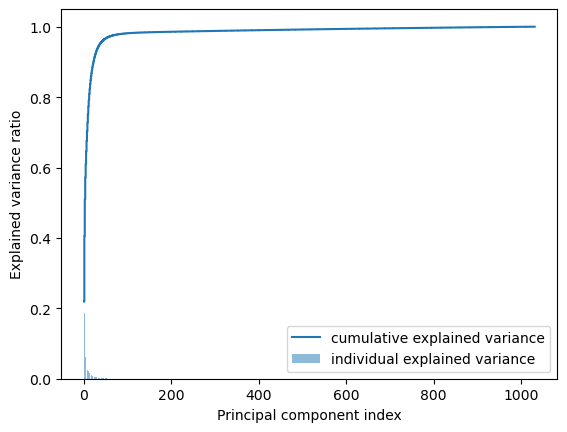

In [21]:
# calculate cumulative sum of explained variances
tot = sum(pca.explained_variance_)
print(pca.explained_variance_)
print(tot)
var_exp = [(i/tot ) for i in sorted(pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
pc_count = len(var_exp)
print(pc_count)
# plot explained variances
plt.bar(range(1,pc_count+1), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,pc_count+1), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

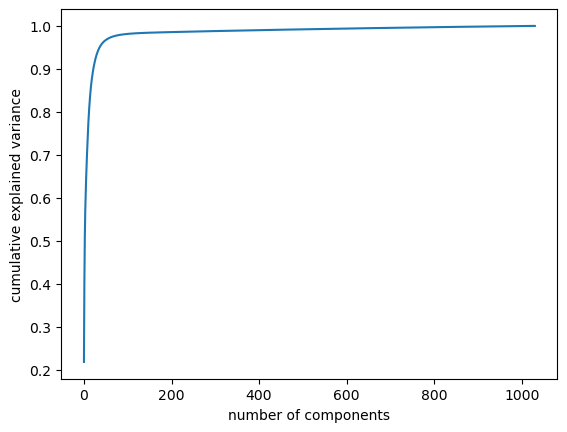

In [22]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## <u> Data Mining </u>

## <u> Data Post-Processing </u>